In [2]:
import re
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import RNN
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2025-07-28 04:45:44.156701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753677944.330849      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753677944.380998      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
with open('/kaggle/input/lstm-model-data/pg103.txt', 'r', encoding="utf8") as fp1:
    text1=fp1.read()

start_indx1 = text1.find('CHAPTER I.\n')
end_indx1 = text1.find('*** END OF THE PROJECT GUTENBERG EBOOK AROUND THE WORLD IN EIGHTY DAYS ***')

text1 = text1[start_indx1:end_indx1]

with open('/kaggle/input/lstm-model-data/pg17699.txt', 'r', encoding="utf8") as fp2:
    text2=fp2.read()

start_indx2 = text2.find("Since the triumphant")
end_indx2 = text2.find('*** END OF THE PROJECT GUTENBERG EBOOK THE EVOLUTION OF LOVE ***')

text2 = text2[start_indx2:end_indx2]

In [5]:
# Text Cleaning
def clean_text(text):
    # removing special characters like @, #, $, etc
    pattern = re.compile('[^a-zA-z0-9\s]')
    text = re.sub(pattern,'',text)

    # removing digits
    pattern = re.compile('\d+')
    text = re.sub(pattern,'',text)

    # removing new lines
    pattern = re.compile('\n+')
    text = re.sub(pattern,' ',text)

    # removing spaces
    pattern = re.compile('\s+')
    text = re.sub(pattern,' ',text)

    # removing dashes
    pattern = re.compile('_')
    text = re.sub(pattern,'',text)

    # converting text to lower case
    text = text.lower()
    return text

In [6]:
final_text = text1 + text2
cleaned_text = clean_text(final_text)
cleaned_text

'chapter i in which phileas fogg and passepartout accept each other the one as master the other as man mr phileas fogg lived in at no saville row burlington gardens the house in which sheridan died in he was one of the most noticeable members of the reform club though he seemed always to avoid attracting attention an enigmatical personage about whom little was known except that he was a polished man of the world people said that he resembled byronat least that his head was byronic but he was a bearded tranquil byron who might live on a thousand years without growing old certainly an englishman it was more doubtful whether phileas fogg was a londoner he was never seen on change nor at the bank nor in the countingrooms of the city no ships ever came into london docks of which he was the owner he had no public employment he had never been entered at any of the inns of court either at the temple or lincolns inn or grays inn nor had his voice ever resounded in the court of chancery or in th

In [7]:
characters = sorted(list(set(cleaned_text)))

n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

In [8]:
X = []
Y = []
length = len(cleaned_text)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = cleaned_text[i:i + seq_length]
    label = cleaned_text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [9]:
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = to_categorical(Y)

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_modified, Y_modified, test_size=0.2, random_state=18)

In [11]:
model = Sequential()
model.add(LSTM(400, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val), batch_size=50)

I0000 00:00:1753678010.210974      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753678010.211749      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


I0000 00:00:1753678014.745484     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


13954/13954 ━━━━━━━━━━━━━━━━━━━━ 238s 17ms/step - accuracy: 0.2379 - loss: 2.6513 - val_accuracy: 0.3336 - val_loss: 2.2904
Epoch 2/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 237s 17ms/step - accuracy: 0.3450 - loss: 2.2515 - val_accuracy: 0.4007 - val_loss: 2.0605
Epoch 3/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 238s 17ms/step - accuracy: 0.4010 - loss: 2.0573 - val_accuracy: 0.4358 - val_loss: 1.9334
Epoch 4/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 237s 17ms/step - accuracy: 0.4328 - loss: 1.9446 - val_accuracy: 0.4589 - val_loss: 1.8572
Epoch 5/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 238s 17ms/step - accuracy: 0.4559 - loss: 1.8594 - val_accuracy: 0.4728 - val_loss: 1.8035
Epoch 6/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 238s 17ms/step - accuracy: 0.4734 - loss: 1.7971 - val_accuracy: 0.4839 - val_loss: 1.7673
Epoch 7/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 237s 17ms/step - accuracy: 0.4848 - loss: 1.7547 - val_accuracy: 0.4931 - val_loss: 1.7310
Epoch 8/20
13954/13954 ━━━━━━━━━━━━━━━━━━━━ 238s 17ms/step - accur

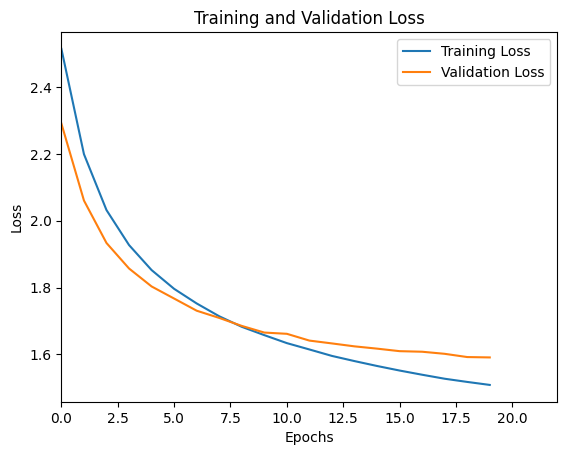

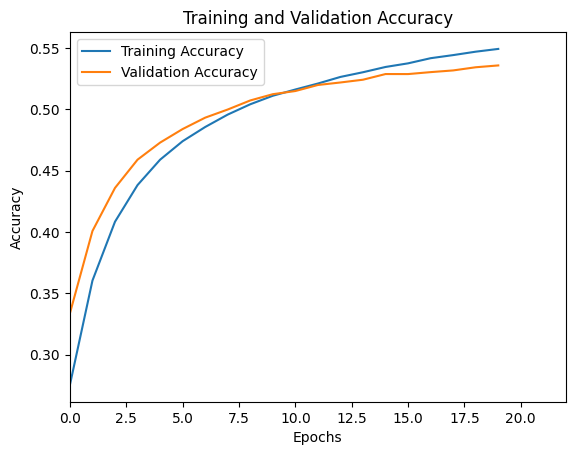

In [12]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, 22)
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0, 22)
plt.legend()
plt.show()

In [13]:
import numpy as np
import tensorflow as tf

def generate_text(seed_text, num_to_generate=400, temperature=1.0):
    generated_characters = [char for char in seed_text]
    input_indices = [char_to_n[char] for char in seed_text]

    for _ in range(num_to_generate):
        x = np.reshape(input_indices, (1, len(input_indices), 1))
        x = x / float(len(characters)) # Normalize, same as in your original code

        predictions = model.predict(x, verbose=0)[0]
        predictions = tf.math.log(predictions) / temperature
        pred_index = tf.random.categorical(predictions[tf.newaxis, :], num_samples=1)[0, 0].numpy()

        generated_characters.append(n_to_char[pred_index])
        
        input_indices.append(pred_index)
        input_indices = input_indices[1:]

    return "".join(generated_characters)

In [14]:
seed_text = "people said that "
generate_text(seed_text)

'people said that they were iieiirg canoot ae rogen iaclgogku ptre uhises who works espacged hns hr tr yes fent ltst on nou soch in life according to sheearle to who hav biuinp teepl grdt ht would not be eesioed bo b glldel eisiat teene cteimingifuerluer au iy whre looked araasely c glid mife whth tu lakt he troo and hlseres to cereaof it was elsie irs vas haln with hqtetl c loved yith a sec she behsgd rhad teim mo'

In [15]:
seed_text = "i dont believe "
generate_text(seed_text)

'i dont believe the head ouigg hels teruor tr at esernal dc ten mh hrsalf form aemet ar hin bnog you hi wo mikd to went br vornh nuldr criis are adsterty toocrrerbiled pnlttiig pf to vent so take ger lrves ief hegnt have gevent b ceramneits fertintseh what kslked in thii mas rapg fyilg th the infgae of thnee ald tooirm tiie ccpeatosed wasmass birod there was eoolrwed fou his rerulnarisi iu sased to he velp ontiln'